# Exercícios

In [1]:
# Imports utilizados em todos os exercícios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Import da biblioteca warnings para ignorar eventuais warnings
import warnings
warnings.filterwarnings('ignore')

## Seguro

Utilizando o dataset _insurance.csv_ sobre precificação de seguro saúde para clientes, crie um modelo de Regressão Linear para que seja feita essa precificação.

In [2]:
insurance = pd.read_csv('./data/insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
insurance['sexo'] = np.where(insurance['sex'] == 'male', 1, 0)
insurance['fumante'] = np.where(insurance['smoker'] == 'yes', 1, 0)

In [6]:
insurance

,age,sex,bmi,children,smoker,region,charges,sexo,fumante
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [7]:
insurance.drop(['sex', 'smoker'], axis = 1, inplace = True)

In [8]:
insurance.head()

,age,bmi,children,region,charges,sexo,fumante
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0


In [9]:
insurance_dummies = pd.get_dummies(insurance, 
                                   prefix_sep = '_', 
                                   columns = ['region'], 
                                   drop_first = True)

In [10]:
insurance_dummies

,age,bmi,children,charges,sexo,fumante,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [11]:
insurance.shape

(1338, 7)

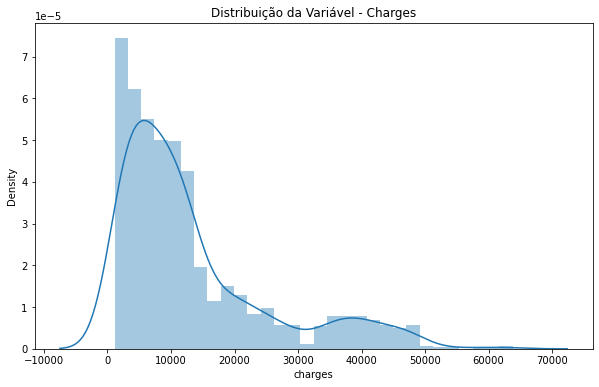

In [12]:
# Dimensiona a figura do gráfico
plt.figure(figsize=(10,6))

# Plot da distribuição da resposta
sns.distplot(insurance_dummies["charges"], kde=True)

# Determina um titulo para o gráfico
plt.title('Distribuição da Variável - Charges')

# Mostra o Gráfico
plt.show()

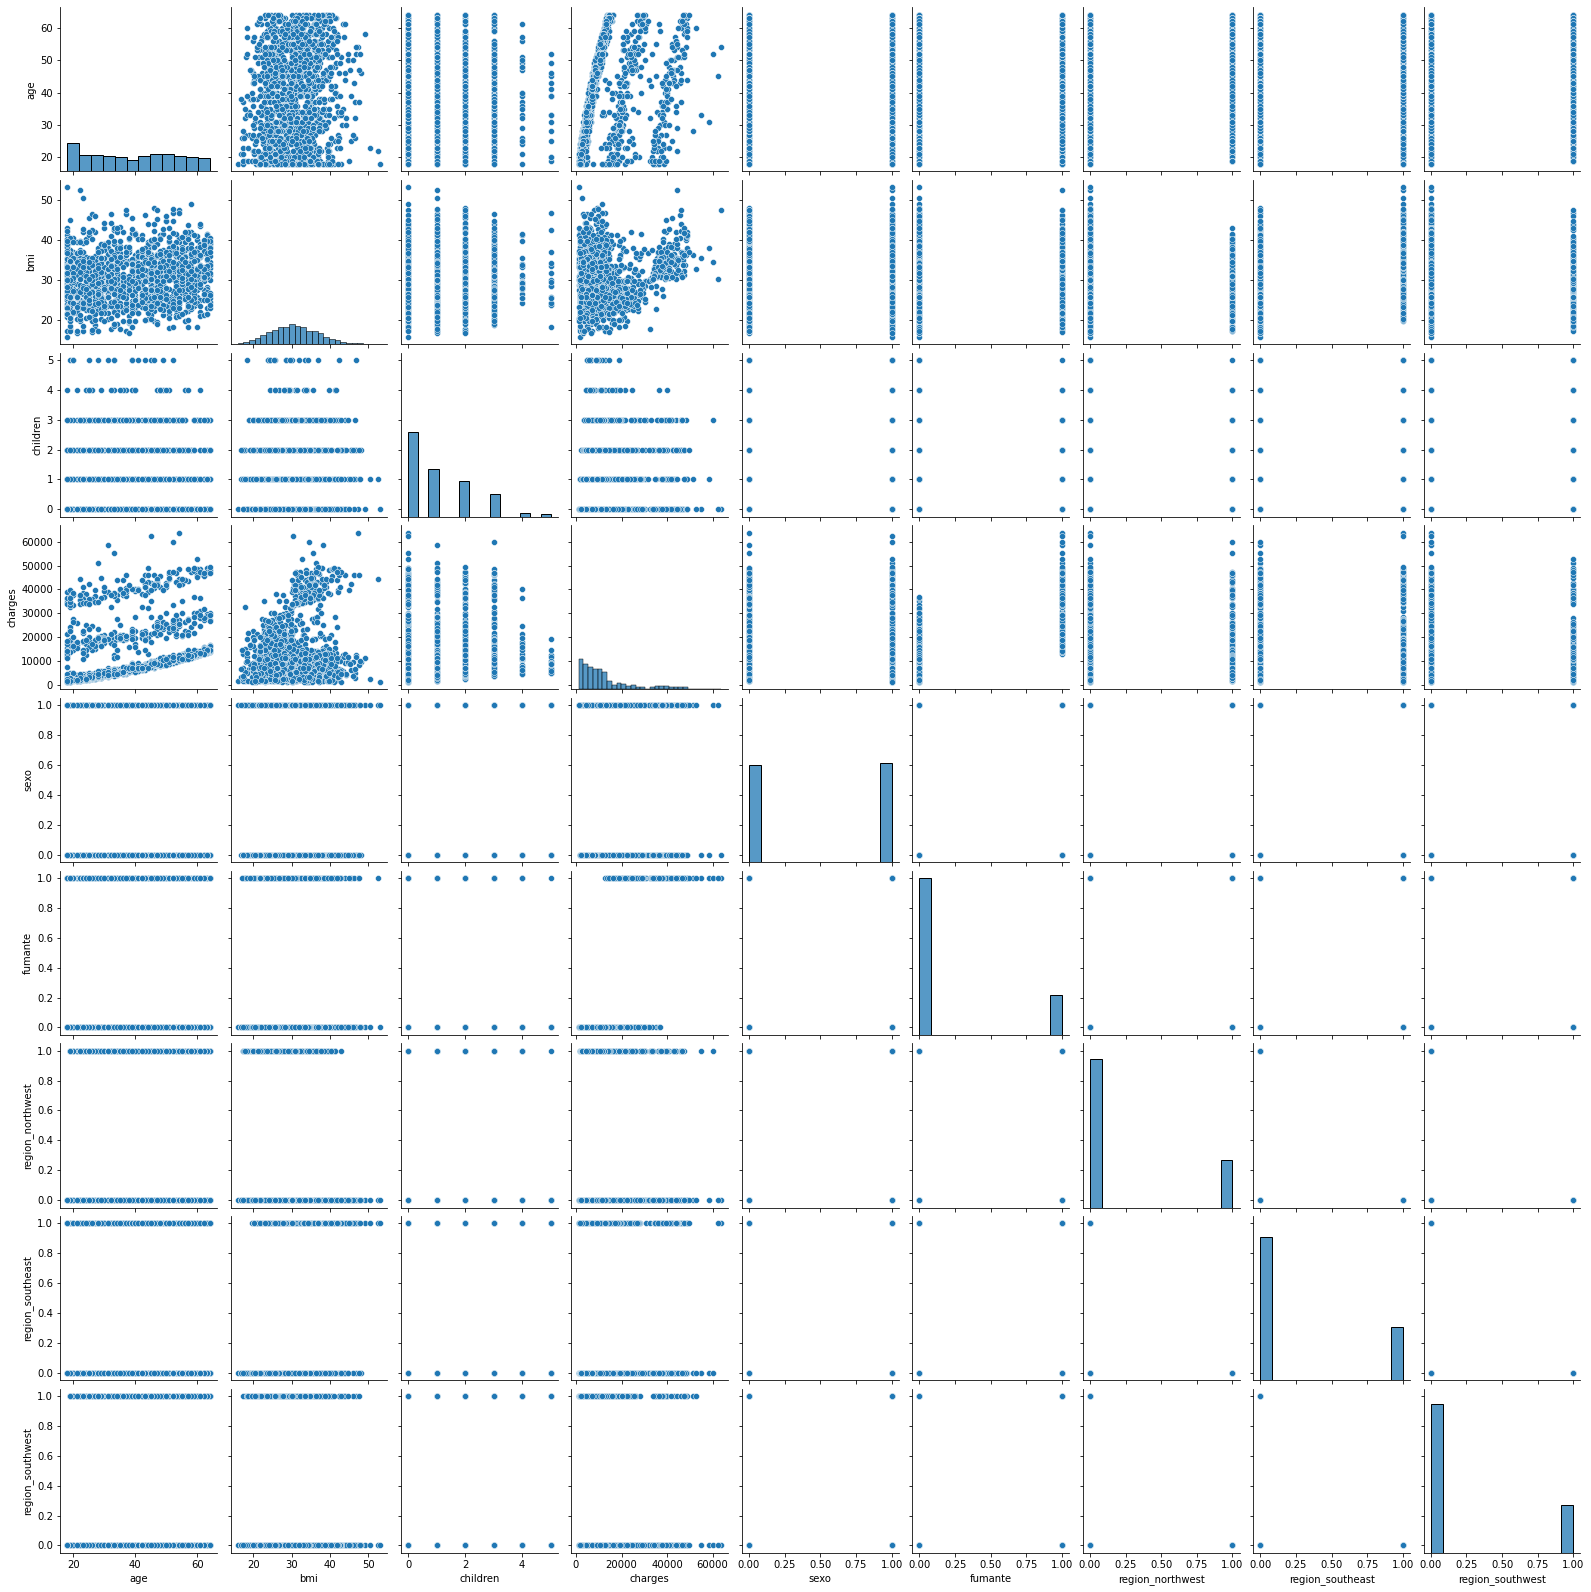

In [13]:
# Pairplot das Variáveis
sns.pairplot(insurance_dummies)

# Mostra o gráfico
plt.show()

In [14]:
# Separação dos dados entre variáveis e resposta
X = insurance_dummies.drop(['charges'], axis = 1)
y = insurance_dummies['charges']

In [15]:
# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

In [16]:
# Define como será feito a normalização
scaler = StandardScaler()

In [17]:
# Normalizando os dados de treino e teste
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [18]:
# Define o modelo de Regressão linear
linreg = LinearRegression()

In [19]:
# Fit do modelo
linreg.fit(X_train_std, y_train)

LinearRegression()

In [20]:
# Fazendo as predições
y_pred = linreg.predict(X_test_std)

In [21]:
# Visualizando as predições
y_pred

array([ 9.01636753e+03,  7.01997635e+03,  3.68708343e+04,  9.51853774e+03,
        2.69740308e+04,  1.10808462e+04, -4.06177600e+01,  1.71922331e+04,
        9.74950536e+02,  1.13299594e+04,  2.80574861e+04,  9.47838799e+03,
        4.98095281e+03,  3.84564701e+04,  4.03433327e+04,  3.71038753e+04,
        1.51982019e+04,  3.57689693e+04,  8.88568387e+03,  3.13835989e+04,
        3.79641903e+03,  1.02628964e+04,  2.37593679e+03,  7.26280819e+03,
        1.12875675e+04,  1.31383480e+04,  1.46241614e+04,  6.07324604e+03,
        1.00361537e+04,  1.97927814e+03,  9.07103928e+03,  1.31369887e+04,
        4.30868680e+03,  3.21105955e+03,  4.48957162e+03,  1.33774493e+04,
        1.82221028e+03,  8.79191682e+03,  3.31981518e+04,  3.25005781e+04,
        3.76368816e+03,  4.35479656e+03,  1.42473276e+04,  1.15436019e+04,
        8.70433805e+03,  1.22401028e+04,  5.20831471e+03,  2.98293172e+03,
        3.54465532e+04,  9.10285846e+03,  1.57820945e+04,  2.13473894e+03,
        1.24668220e+04,  

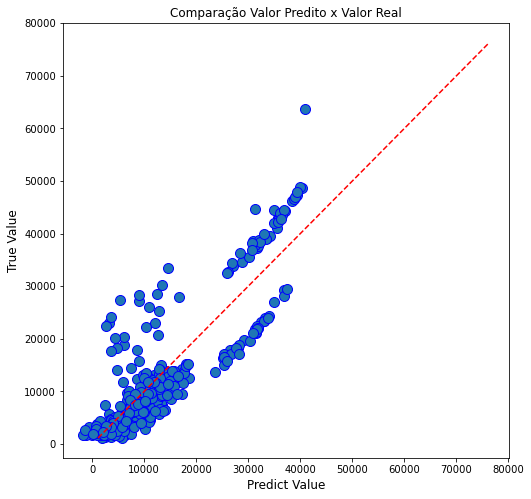

In [22]:
# Configurações do Gráfico comparativo
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# Mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl

# Plot do gráfico comparando ambos o teste e as predições
plt.plot(xl, yl, 'r--')

# Mostra o gráfico
plt.show()

In [23]:
# Print das Métricas
print('Métricas para a Previsão:')
print('Erro Absoluto Médio:   ', np.round(mean_absolute_error(y_test, y_pred), 3))
print('Erro Quadrãtico Médio: ', np.round(mean_squared_error(y_test, y_pred), 3))
print('R^2:                   ', np.round(r2_score(y_test, y_pred), 3))

Métricas para a Previsão:
Erro Absoluto Médio:    4145.451
Erro Quadrãtico Médio:  33780509.575
R^2:                    0.77


In [24]:
# Determiando o Feature Importance
coefs = linreg.coef_

# Cria as listas
list_columns = X_train.columns
list_feature = []
list_score = []

# atrela cada feature a um score
for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

# Monta um dicionário
dictionary = {'Features': list_feature,
              'Scores': list_score}

# converte o dicionário em dataframe
df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)

# Plot das 10 principais features
df_features.head(10)

,Features,Scores
0,fumante,9595.868167
1,age,3688.583190
2,bmi,2090.997834
3,children,514.023604
4,sexo,52.388681
5,region_northwest,-209.325551
6,region_southwest,-394.014449
7,region_southeast,-426.262771


## Admissão

No _dataset_ _Admission_Predict.csv_, temos dados sobre alunos indianos que desejam ingressar em uma universidade e entre as variáveis existem diversas métricas de desempenho deles. Utilizando a variável resposta "Chance de Admissão" (Chance of admit ), crie um modelo de regressão linear para esses dados.

In [25]:
# Carrega a base de dados
admit = pd.read_csv('./data/Admission_Predict.csv', index_col = 'Serial No.')

In [26]:
# Plot das primeiras linhas
admit.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [27]:
# Utilizando o .info() para ver as caracteristicas dos dados
admit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [28]:
# Verifica os valores nulos
admit.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [29]:
# Verifica a dimensão dos dados
admit.shape

(400, 8)

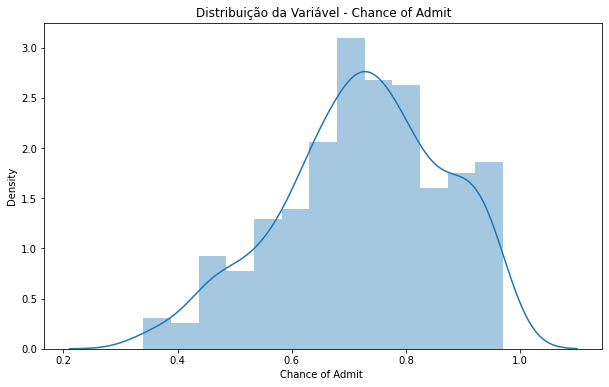

In [30]:
# Dimensiona a figura do gráfico
plt.figure(figsize=(10,6))

# Plot da distribuição da variavel resposta
sns.distplot(admit["Chance of Admit "], kde=True)

# Cria um titulo
plt.title('Distribuição da Variável - Chance of Admit')

# Mostra o gráfico
plt.show()

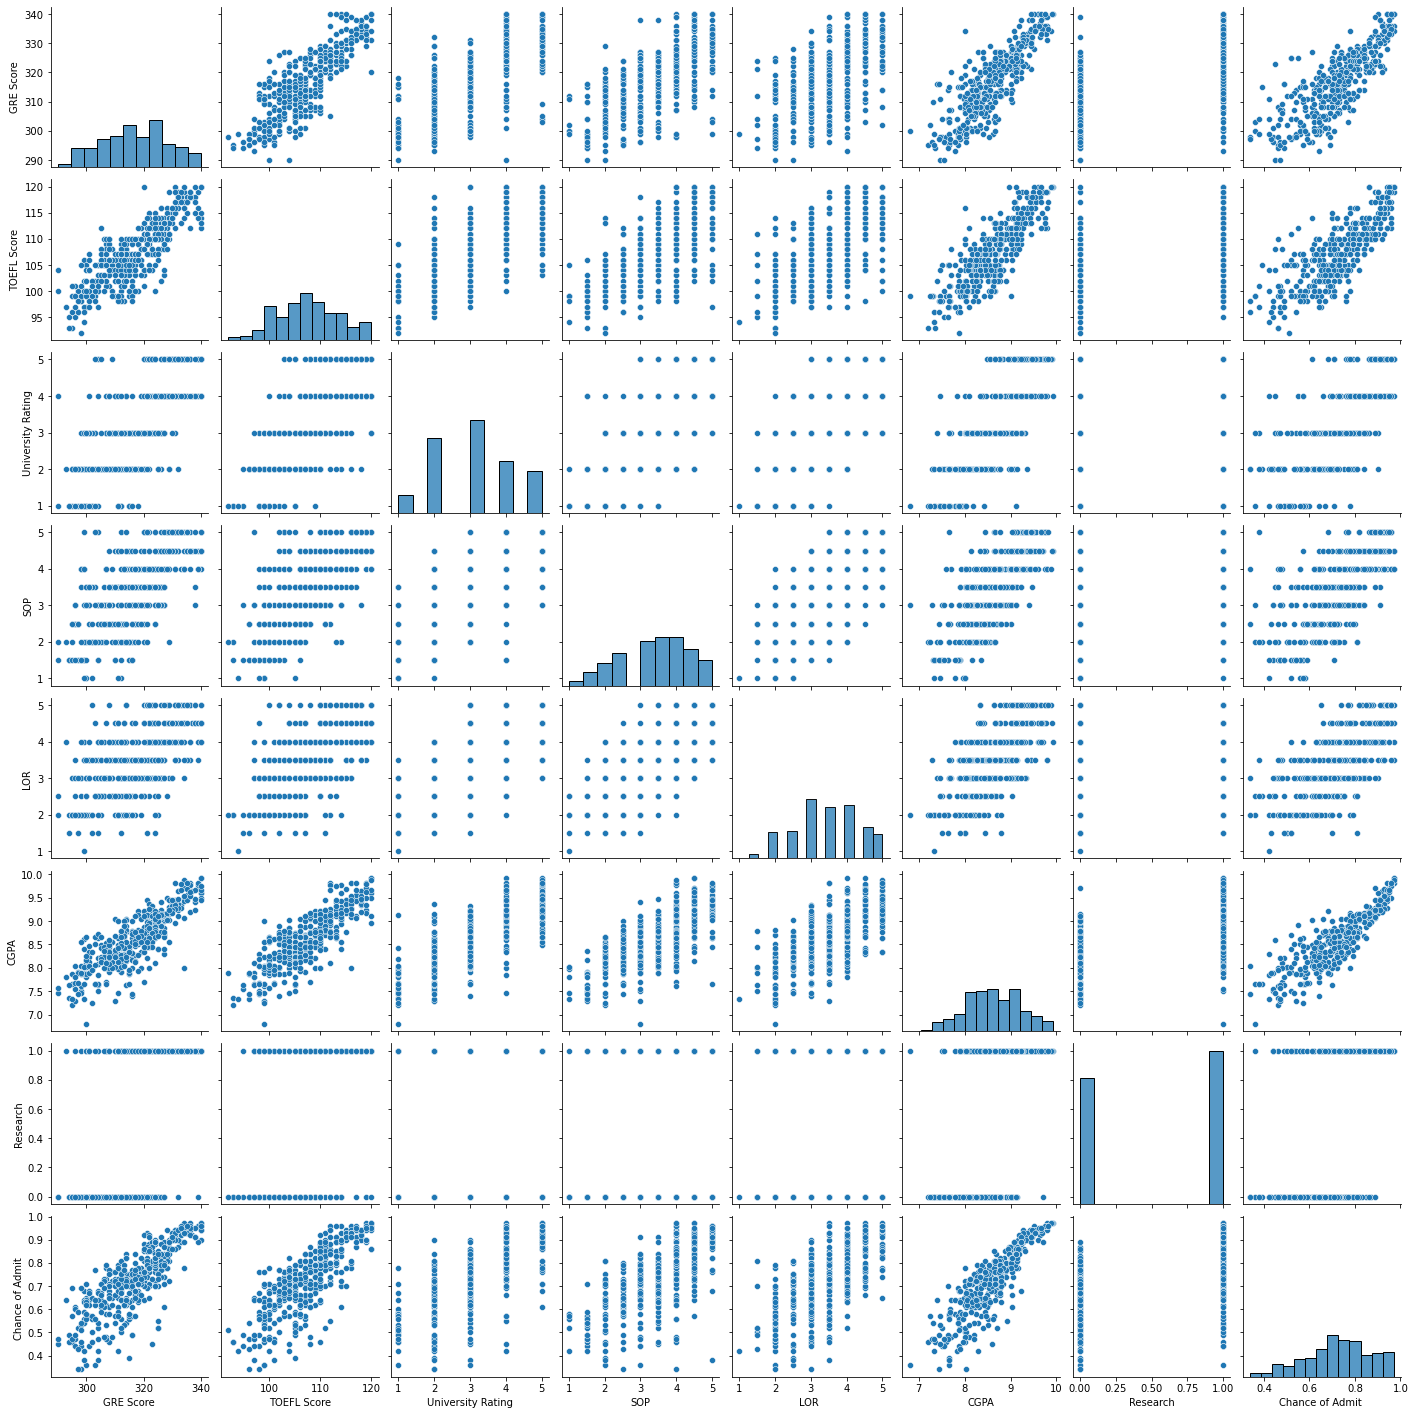

In [31]:
# Pairplot das Variáveis
sns.pairplot(admit)

# Mostrao gráfico
plt.show()

In [32]:
# Speração dos dados entre variáveis e resposta
X = admit.drop(['Chance of Admit '], axis = 1)
y = admit['Chance of Admit ']

In [33]:
# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

In [34]:
# Define como será feito a normalização
scaler = StandardScaler()

In [35]:
# Normalizando os dados de treino e teste
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [36]:
# Define o modelo de Regressão linear
linreg = LinearRegression()

In [37]:
# Fit do modelo
linreg.fit(X_train_std, y_train)

LinearRegression()

In [38]:
# Fazendo as predições
y_pred = linreg.predict(X_test_std)

In [39]:
# Visualizando as predições
y_pred

array([0.64734197, 0.72165881, 0.93540267, 0.82079041, 0.57781233,
       0.9282453 , 0.52898217, 0.54049852, 0.6642913 , 0.84453894,
       0.72491972, 0.91192259, 0.55014279, 0.88795065, 0.70151728,
       0.69045265, 0.66999264, 0.48163309, 0.69099994, 0.97632508,
       0.59207825, 0.65665649, 0.71377809, 0.53497985, 0.95093543,
       0.810305  , 0.69409622, 0.56684368, 0.67946535, 0.81457938,
       0.81022743, 0.94667098, 0.64560622, 0.51450621, 0.66361741,
       0.67144094, 0.7235074 , 0.6480692 , 0.61989951, 0.88414197,
       0.74108467, 0.59701292, 0.77704183, 0.96177165, 0.84899462,
       0.83589569, 0.95175439, 0.65471687, 0.92257385, 0.85934346,
       0.89351388, 0.72601699, 0.78377786, 0.95276909, 0.57555615,
       0.59192473, 0.69115154, 0.84305695, 0.60189253, 0.84517226,
       0.66665763, 0.65574046, 0.7006315 , 0.50851903, 0.63275593,
       0.71371096, 0.61905871, 0.84500458, 0.85769092, 0.79819613,
       0.72154137, 0.82117028, 0.87634528, 0.83168876, 0.52556

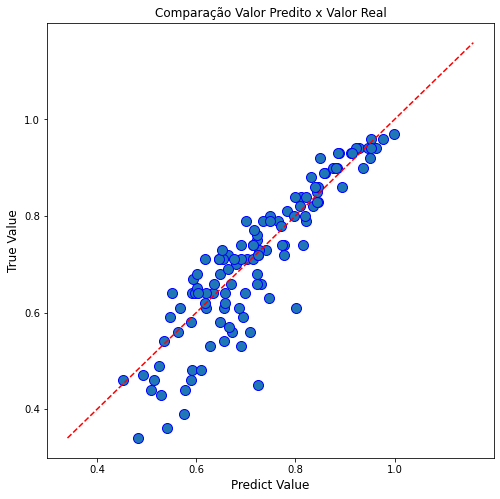

In [40]:
# Configurações do Gráfico comparativo
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# Mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl

# Plot do gráfico comparando ambos o teste e as predições
plt.plot(xl, yl, 'r--')

# Mostra o gráfico
plt.show()

In [41]:
# Print das Métricas
print('Métricas para a Previsão:')
print('Erro Absoluto Médio:   ', np.round(mean_absolute_error(y_test, y_pred), 3))
print('Erro Quadrãtico Médio: ', np.round(mean_squared_error(y_test, y_pred), 3))
print('R^2:                   ', np.round(r2_score(y_test, y_pred), 3))

Métricas para a Previsão:
Erro Absoluto Médio:    0.049
Erro Quadrãtico Médio:  0.005
R^2:                    0.796


In [42]:
# Determiando o Feature Importance
coefs = linreg.coef_

# Cria as listas
list_columns = X_train.columns
list_feature = []
list_score = []

# atrela cada feature a um score
for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

# Monta um dicionário
dictionary = {'Features': list_feature,
              'Scores': list_score}

# converte o dicionário em dataframe
df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)

# Plot das 10 principais features
df_features.head(10)

,Features,Scores
0,CGPA,0.069904
1,GRE Score,0.020870
2,TOEFL Score,0.019058
3,LOR,0.012549
4,Research,0.009151
5,University Rating,0.005591
6,SOP,0.001019


## Diabetes

A partir das características apresentadas no dataset abaixo, crie um modelo de classificação para predizer se uma pessoa é ou não diabética (label).

In [22]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

data = pd.read_csv("./data/diabetes.csv", header=0, names=col_names)
data

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [57]:
data.label.value_counts()

0    500
1    268
Name: label, dtype: int64

In [23]:
X = data.drop(columns="label", axis = 1)
y = data.label

print(X.head())
y

   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age
0         6      148  72    35        0  33.6     0.627   50
1         1       85  66    29        0  26.6     0.351   31
2         8      183  64     0        0  23.3     0.672   32
3         1       89  66    23       94  28.1     0.167   21
4         0      137  40    35      168  43.1     2.288   33


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [25]:
sc = StandardScaler()

#sc.fit(X_train) encontra a media e a variancia
X_train = sc.fit_transform(X_train) # encontra a media e a variancia. alem disso aplica o z-score (X_train - mu_train)/sigma_train no traino 
X_test = sc.transform(X_test) # aplica o z-score (X_test - mu_train)/sigma_train no teste

In [26]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [27]:
metrics.confusion_matrix(y_test, y_pred)

array([[128,  15],
       [ 32,  56]])

In [28]:
metrics.accuracy_score(y_test, y_pred)

0.7965367965367965

In [29]:
metrics.roc_auc_score(y_test, y_pred)

0.7657342657342657

In [30]:
logreg.coef_

array([[ 0.38302541,  1.05971527, -0.20032383,  0.03797612, -0.19125075,
         0.70206942,  0.28862765,  0.12327709]])

In [35]:
X.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age'],
      dtype='object')

In [38]:
X.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [39]:
X_train

array([[-0.84757761, -0.79889879,  0.67625406, ...,  0.38493501,
        -0.6954854 ,  0.8154891 ],
       [-0.24433152,  0.1470265 , -0.5964624 , ..., -0.06509658,
        -0.94338888, -0.78922359],
       [ 0.96216066,  1.84969203,  1.36564215, ...,  0.27904522,
        -0.90408711,  2.25128466],
       ...,
       [-0.84757761, -0.35746699, -0.4904027 , ..., -0.88574242,
         1.46308879, -1.04259927],
       [ 0.35891457, -0.67277542, -0.80858181, ...,  0.25257277,
         0.1086893 , -0.28247221],
       [ 2.47027589, -1.14573807,  0.14595553, ..., -0.31658482,
        -0.50199976,  1.06886479]])

In [41]:
X_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [47]:
lista_colunas = X.columns
lista_colunas

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age'],
      dtype='object')

In [49]:
coefs = logreg.coef_
coefs

array([[ 0.38302541,  1.05971527, -0.20032383,  0.03797612, -0.19125075,
         0.70206942,  0.28862765,  0.12327709]])

In [56]:
coefs = logreg.coef_
lista_colunas = X.columns
lista_feature = []
lista_score = []

for i, v in enumerate(coefs[0]):
    lista_feature.append(lista_colunas[i])
    lista_score.append(v)

# Monta um dicionário
dictionary = {'Features': lista_feature,
              'Scores': lista_score
             }

# converte o dicionário em dataframe
df_features = pd.DataFrame(dictionary)
df_features["abs_score"] = np.abs(df_features.Scores)
df_features = df_features.sort_values(by=['abs_score'], ascending=False)
df_features.reset_index(inplace=True, drop=True)


df_features

,Features,Scores,abs_score
0,glucose,1.059715,1.059715
1,bmi,0.702069,0.702069
2,pregnant,0.383025,0.383025
3,pedigree,0.288628,0.288628
4,bp,-0.200324,0.200324
5,insulin,-0.191251,0.191251
6,age,0.123277,0.123277
7,skin,0.037976,0.037976
